# **Libraries**

In [3]:
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
import pandas
import sklearn
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Conv2DTranspose,Concatenate,UpSampling2D,Add,Input,BatchNormalization,Embedding,Reshape,UpSampling2D,Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import plot_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Load Data And Visualize**

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sprites/sprites_1788_16x16.npy
/kaggle/input/sprites/sprite_labels_nc_1788_16x16.npy


In [5]:
sprites=np.load("/kaggle/input/sprites/sprites_1788_16x16.npy")
labels=np.load("/kaggle/input/sprites/sprite_labels_nc_1788_16x16.npy")

In [6]:
k=[[1] for i in range(len(sprites))]

In [7]:
def plotImageData(images,labels):
    
    plt.figure(figsize=(3,3))
    
    for i in range(16):
        
        plt.subplot(4,4,i+1)
        plt.imshow(images[i])
    
    plt.show()

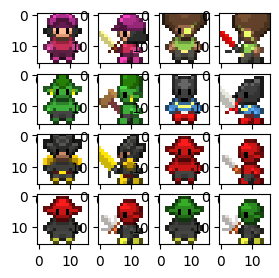

In [8]:
plotImageData(sprites[:16],labels[:16])

# **Model**

In [9]:
model=Sequential([
    
    Input((16,16,3)),    
    Conv2D(32,(2,2),activation="relu"),
    Conv2D(32,(2,2),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation="relu"),
    Conv2D(32,(2,2),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(2048,activation="relu"),
    Dropout(0.2),
    Dense(1024,activation="relu"),
    Dropout(0.3),
    Dense(256,activation="relu"),
    Dense(1,activation="sigmoid")  
])

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy")

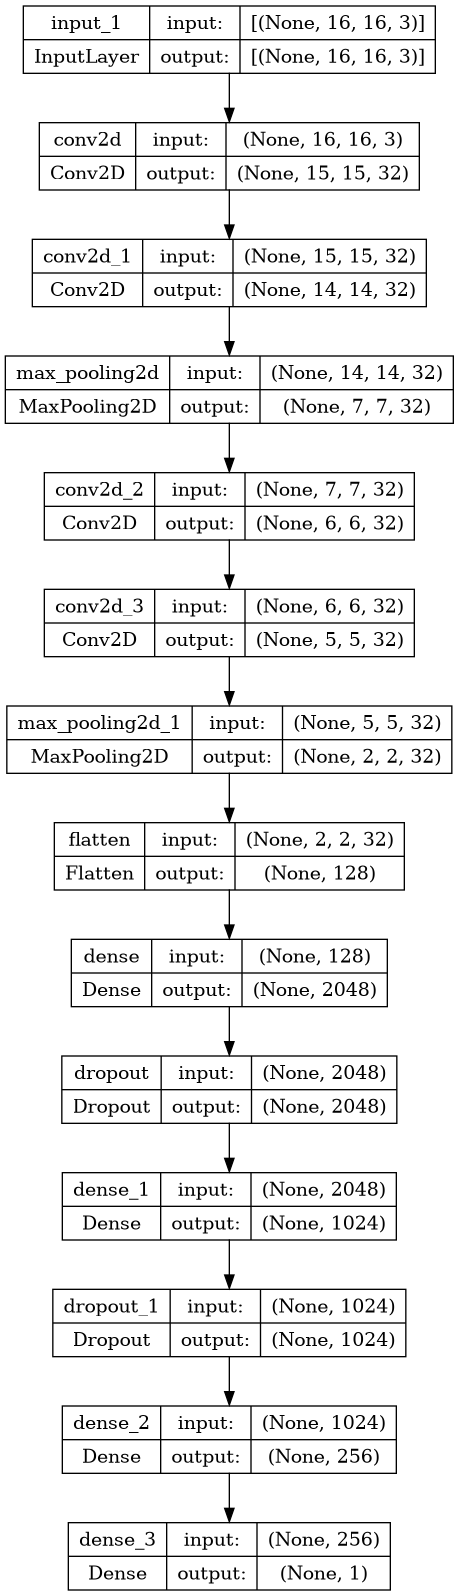

In [11]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [12]:
k=[[[0,0,0]for i in range(16)]for i in range(16)]

In [18]:
model.fit([k],[[1]],epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6397
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6392
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6388
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6383
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6379
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6374
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6369
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6365
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6360
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6356
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6351
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6346
Epoch 13/1000
1/1 [==========================